### Consigna 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [2]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

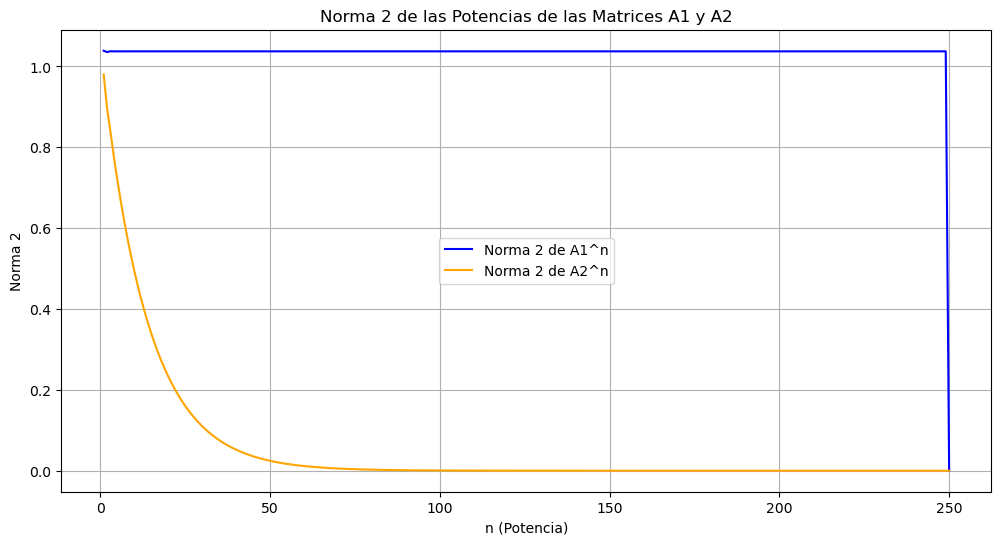

In [3]:
N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)

for i in range(0,N-1):
  a1[i] = norm(np.linalg.matrix_power(A1, i + 1), ord=2)
  a2[i] = norm(np.linalg.matrix_power(A2, i + 1), ord=2)

plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), a1, label='Norma 2 de A1^n', color='blue')
plt.plot(range(1, N + 1), a2, label='Norma 2 de A2^n', color='orange')
plt.title('Norma 2 de las Potencias de las Matrices A1 y A2')
plt.xlabel('n (Potencia)')
plt.ylabel('Norma 2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 

In [54]:
def metodoPotencia(A,num_iteraciones):
  tolerancia = 1e-6
  autovalores = []
  n = A.shape[0]

  for _ in range(num_iteraciones):
    x0 = np.random.rand(n)
    x0 = x0 / np.linalg.norm(x0)

    while True:
      x1 = A@x0
      x1 = x1/np.linalg.norm(x1)
      if (np.linalg.norm(x1 - x0)) < tolerancia :
        break
      x0 = x1

    autovalor = (x0.T @ A @ x0) 
    autovalores.append(autovalor)

  promedio = np.mean(autovalores)
  desviacion_estandar = np.std(autovalores)
  maxaval = max(autovalores)

  return promedio, desviacion_estandar , maxaval, autovalores

# que onda la toleracia de convergencia entre vectores ? puedo asumir que siempre existe convergencia ?

In [10]:
p1,d1,a1 = metodoPotencia(A1,250)
print ("El autovalor mas grande de A1 es: " + str(a1))

p2,d2,a2 = metodoPotencia(A2,250)
print ("El autovalor mas grande de A2 es: " + str(a2))

El autovalor mas grande de A1 es: 1.0000000713293526
El autovalor mas grande de A2 es: 0.9276516294740913


In [12]:
import pandas as pd

data = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalores': [p1, p2],
    'Desviación Estándar': [d1, d2]
}

tabla = pd.DataFrame(data)

# Mostrar la tabla
print(tabla)

  Matriz  Promedio Autovalores  Desviación Estándar
0     A1              1.000000         3.361473e-08
1     A2              0.927651         1.085698e-07


In [48]:
a = np.array([1,1,1])
ab = np.array([1,10,71])
print(a*ab)

[ 1 10 71]


### Consigna 4 

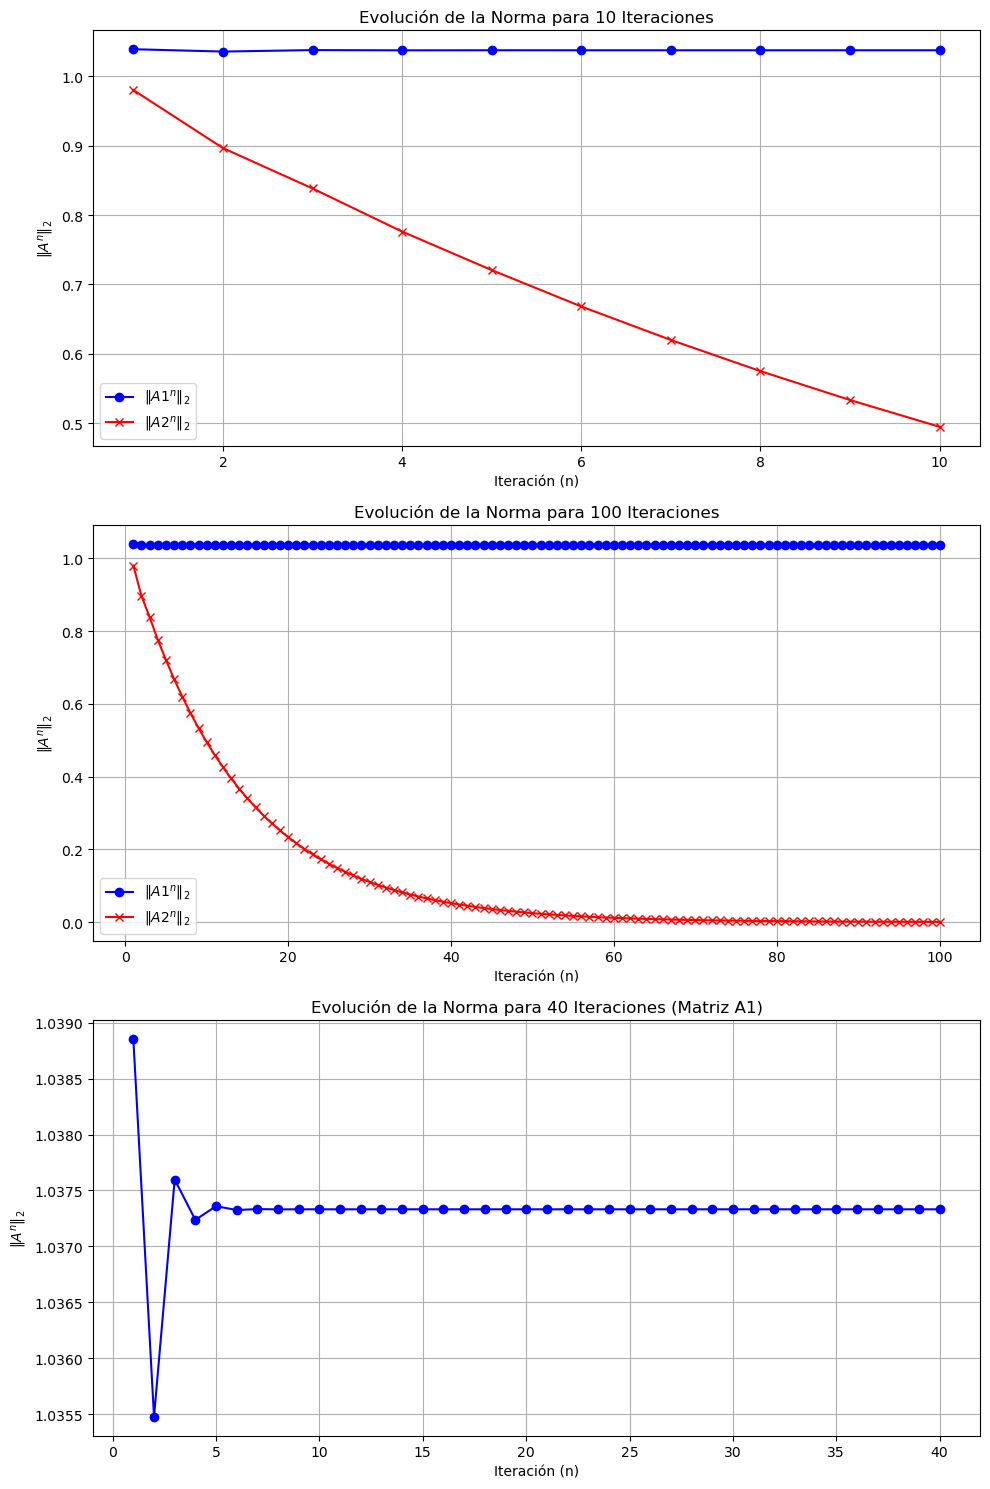

In [15]:

def sucesion_de_potencias(A,k):
  normas = []
  A_potencia = np.eye(A.shape[0])

  for i in range(1,k + 1 ):
    A_potencia = A_potencia@A
    norma = norm(A_potencia, 2)
    normas.append(norma)

  return normas

normasA1_10 = sucesion_de_potencias(A1,10)
normasA2_10 = sucesion_de_potencias(A2,10)

normasA1_100 = sucesion_de_potencias(A1,100)
normasA2_100 = sucesion_de_potencias(A2,100)


normasA1_40 = sucesion_de_potencias(A1,40)

# GRAFICOS

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de la serie de normas para 10 iteraciones
ax1.plot(range(1, len(normasA1_10) + 1), normasA1_10, marker='o', color='b', label=r'$\|A1^n\|_2$')
ax1.plot(range(1, len(normasA2_10) + 1), normasA2_10, marker='x', color='r', label=r'$\|A2^n\|_2$')
ax1.set_xlabel('Iteración (n)')
ax1.set_ylabel(r'$\|A^n\|_2$')
ax1.set_title('Evolución de la Norma para 10 Iteraciones')
ax1.legend()
ax1.grid(True)

# Gráfico de la serie de normas para 100 iteraciones
ax2.plot(range(1, len(normasA1_100) + 1), normasA1_100, marker='o', color='b', label=r'$\|A1^n\|_2$')
ax2.plot(range(1, len(normasA2_100) + 1), normasA2_100, marker='x', color='r', label=r'$\|A2^n\|_2$')
ax2.set_xlabel('Iteración (n)')
ax2.set_ylabel(r'$\|A^n\|_2$')
ax2.set_title('Evolución de la Norma para 100 Iteraciones')
ax2.legend()
ax2.grid(True)

# Gráfico de la serie de normas de A1 para 40 iteraciones
ax3.plot(range(1, len(normasA1_40) + 1), normasA1_40, marker='o', color='b')
ax3.set_xlabel('Iteración (n)')
ax3.set_ylabel(r'$\|A^n\|_2$')
ax3.set_title('Evolución de la Norma para 40 Iteraciones (Matriz A1)')
ax3.grid(True)

# Ajuste de la distribución de subgráficos
plt.tight_layout()
plt.show()




Notemos que hay convergencia solo para la matriz A2, esto pues la serie de potencias de su norma converge. Su convergencia es hacia 0, y A1 no converge, sino que comienza a oscilar de forma constante al rededor del valor 1.0374.
Una regla general para que la serie infinita de normas de las potencias de una matriz converga es que el mayor autovalor en valor absoluto de la matriz sea menor que 1 , es decir que su radio espectral lo sea.
para nuestro ejemplo, recordemos que el autovalor de A1 era igual a 1.0000000895350079 y el de A2 era menor, exactamente 0.9276516098096924.

In [18]:
#falta inciso (d)

### Consigna 5 

In [21]:
Appdata = pd.read_csv("Appdata.csv")
Anndata = pd.read_csv("Anndata.csv")
App = Appdata.values
Ann = Anndata.values

In [82]:
import numpy as np

def metodoPotencia(A, num_iteraciones):
    tolerancia = 1e-6
    autovalores = []
    n = A.shape[0]
    x0 = np.random.rand(n)  # Vector inicial
    x0 = x0 / np.linalg.norm(x0)
    
    for _ in range(num_iteraciones):
        x1 = A @ x0
        x1 = x1 / np.linalg.norm(x1)
        
        autovalor = (x0.T @ A @ x0) / (x0.T @ x0) #### por que no dividis por el prod interno?
        autovalores.append(autovalor)
        if np.linalg.norm(x1 - x0) < tolerancia:
            break
        x0 = x1
    
    promedio = np.mean(autovalores)
    desviacion_estandar = np.std(autovalores)
    maxaval = max(autovalores)
    
    return promedio, desviacion_estandar, maxaval, autovalores
pAnn,dAnn,avalmaxAnn, avalsAnn = metodoPotencia(Ann,50)
pApp,dApp,avalmaxApp, avalsApp = metodoPotencia(App,50)

print ("El autovalor mas grande de Ann es: " + str(avalmaxAnn))
print(avalsAnn)
print ("El autovalor mas grande de App es: " + str(avalmaxApp))
print(avalsApp)

El autovalor mas grande de Ann es: 0.2630446199670209
[0.18111435118454505, 0.2593919515622555, 0.25630789855119684, 0.2622734408607651, 0.2630446199670209, 0.262665392210056, 0.262180829969717, 0.26176278510919787, 0.2614459121943163, 0.2612185511030442, 0.2610587213330904, 0.2609472294268676, 0.260869773461965, 0.26081610604668415, 0.2607789850664098, 0.26075333630490555, 0.26073562567400277, 0.2607234010707233, 0.26071496504624475, 0.26070914420272817, 0.2607051280957712, 0.2607023572541765, 0.260700445577305, 0.2606991266562398, 0.26069821668578785, 0.26069758885725774, 0.2606971556853443, 0.2606968568136794, 0.260696650601699, 0.26069650832062513, 0.2606964101494804, 0.26069634241286654, 0.26069629567536307]
El autovalor mas grande de App es: 0.3935175873815785
[0.34388083768708444, 0.3935175873815785, 0.3886484758899472, 0.3894017250274002, 0.3880804206499321, 0.38642514709336917, 0.385402341717078, 0.38492662825150165, 0.38474905217276256, 0.3846991517033882, 0.3846950511914211,

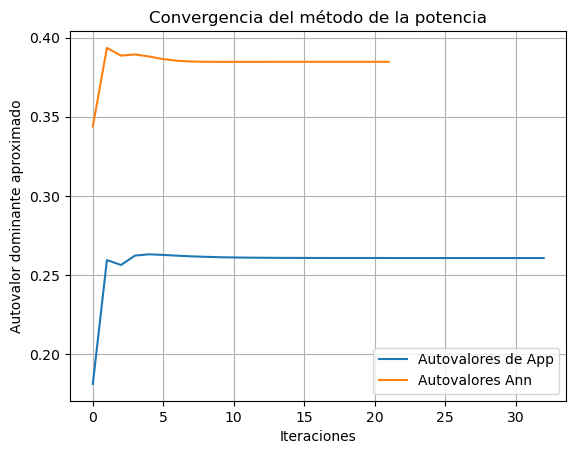

In [86]:
plt.plot(avalsAnn, label='Autovalores de App')
plt.plot(avalsApp, label='Autovalores Ann')
plt.xlabel('Iteraciones')
plt.ylabel('Autovalor dominante aproximado')
plt.title('Convergencia del método de la potencia')
plt.legend()
plt.grid(True)
plt.show()

### Consigna 6

falta pasar a latex

### Consigna 7

In [ ]:
def metodoPotenciaRecursivo(C, k, epsilon=1e-6, autovalores=None, autovectores=None):
    if autovalores is None:
        autovalores = []
    if autovectores is None:
        autovectores = []
    
    # Caso base: si ya hemos encontrado k autovalores/autovectores, terminamos
    if len(autovalores) == k:
        return autovalores, autovectores
    
    # Generamos un vector aleatorio normalizado
    n = C.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)
    
    # Iteramos
    x_next = C @ x
    x_next = x_next / np.linalg.norm(x_next)
    
    while np.linalg.norm(x_next - x) >= (1 - epsilon):
        x = x_next
        x_next = C @ x
        x_next = x_next / np.linalg.norm(x_next)
    
    # Calculamos el autovalor usando el cociente de Rayleigh y lo guardamos con el autovector aproximado
    autovalor = (x.T @ C @ x) / (x.T @ x)
    autovalores.append(autovalor)
    autovectores.append(x)  # Aquí se guarda el autovector correspondiente

    # Construimos la nueva matriz C' = C - autovalor * x * x^T
    Cprima = C - autovalor * np.outer(x, x)

    return metodoPotenciaRecursivo(Cprima, k, epsilon, autovalores, autovectores)



In [ ]:
#Armamos nuestra matriz de covarianzas C del paıs Peru
In = np.eye(40)
e = np.ones((40, 1))
eeT = np.outer(e, e)
En = In - (1 / 40) * eeT
AppC = En@App
C = (np.transpose(AppC)@AppC)/(40 - 1)

In [ ]:
autovalores, autovectores = metodoPotenciaRecursivo(C, k=2)
for i in range(len(autovalores)):
    print(f"Autovector {i+1}: {autovectores[i].flatten()}")
    print(f"Autovalor {i+1}: {autovalores[i]}")